<center>

<h1> </h1>

<img src="https://capacitacion.centrocoyol.com/wp-content/uploads/2018/08/logoSuperior.png" alt="TECLOGO" height="50" >


Instituto Tecnológico de Costa Rica

Carrera de Ingeniería de Computación

Escuela de Computación

Inteligencia Artificial <br>
<img src="https://sitiobigdata.com/wp-content/uploads/2019/02/google-colab.jpeg" alt="Colab" height="50" >   <br>
Tarea/Quiz 5 <br>
Profesor:Luis Alexander Calvo Valverde<br>
Estudiantes:
<br> Raquel Miranda Pérez
<br>Carlos Adrián Gómez Segura
            
Primer Semestre<br>
16 de Marzo de 2020

</center>

---
#Introducción
---
El presente trabajo consiste en la exploración de Google Colab, para la inducción del tema de Inteligencia Artificial. Detro de este "notebook" de 
Google Colab, se hace uso de librerías como Pandas para la carga masiva de datos, y la preparación de los mismos para su futura gestión y uso. 

Dentro de los temas, que se tocan son los filtros y la convolución.

También se hace referencia a librerías para la representación de datos en distintos gráficos para su interpretación y visualizaciones de los mismos. 







---
#Importación de librerías
---



In [1]:
#Capítulo 1
#Importar las  herramientas necesarias


import scipy 
print('scipy %s'%scipy.__version__)

import numpy 
print('numpy %s'%numpy.__version__)

import matplotlib 
print('matplotlib %s'%matplotlib.__version__)

import pandas as pnd
print('pandas %s'%pnd.__version__)

import statsmodels 
print('statsmodels %s'%statsmodels.__version__)

import sklearn 
print('sklearn %s'%sklearn.__version__)

scipy 1.4.1
numpy 1.17.5
matplotlib 3.1.3
pandas 0.25.3
statsmodels 0.10.2
sklearn 0.22.1


---
#1. Convolución discreta
---


Para la convolución discreta se tienen dos funciones, que se mapean a través de la técnica de la ventana deslizante con el objetivo de procesarlas. Para esta sección se procede en primera instancia a realizar el desarrollo matemático de la convolución sobre las funciones f[n] y g[n]. Seguido se implementa la función *y = hagaConvolucion1D(f,g)*. La convolución discreta para ambas funciones se define como:

$h\left [ n \right ]=f\left [ n \right ]*g\left [ n \right ]=\sum_{m=-\infty }^{\infty }f\left [ m \right ]g\left [ n-m \right ]$





###Comprobación de la convolución 
####Funciones
$F = \{ 1,2,3,4,5 \}$  <br>
$G = \{1,2,3 \} $ <br>
#### Desarrollo de  H[0]  
$h[0] = f [0] * g [0 − 0] $ <br>
$h[0] = f [0] * g [0] $ <br>
$h[0] = 1 * 1 $ <br>
$h[0] = 1 $ <br>

#### Desarrollo de  H[1]  
$h[1] =  f [0] * g [1 − 0] +  f [1] * g [1 − 1] $ <br>
$h[1] =  f [0] * g [1] +  f [1] * g [0] $ <br>
$h[1] =  1 * 2  + 2 * 1 $ <br>
$h[1] = 2 + 2 $ <br>
$h[1] = 4 $ <br>


#### Desarrollo de H[2]  
$h[2] =  f [0]*g [2 − 0] + f [1]*g [2 − 1] + f[2] * g[2 − 2] $ <br>
$h[2] =  f [0] * g [2] +  f [1] * g [1] + f[2] * g[0] $ <br>
$h[2] =  1 * 3  + 2 * 2 + 3*1 $ <br>
$h[2] = 3 + 4 + 3 $ <br>
$h[2] = 10 $ <br>

$Resultado =  \{  1,4,10  \} $


El método *hagaConvolucion1D(f,g)* se encarga convolucionar en python dos funciones. Mismas que recibe por parámetro, luego valida que el tamaño de la función **f** sea mayor que el tamaño de la función **g**, de ser así se procede a convertir los valores de las funciones en matrices Numpy. Seguido se hace el proceso de convolución haciendo uso de la fórmula que define la convolución discreta para ambas funciones. De este modo retorna un Dataframe que contiene el resultado de la variable **y**, siendo esta el resultado final de la operación.
Como se puede observar en el resultado final guardado en la variable *resultadoConvolucion*, los valores que el proceso matemático arrojó como resultado anteriormente en 3 iteraciones se encuentran en el resultado de esta variable.  

In [2]:

#funcion de la convolucion
def hagaConvolucion1D(f,g):
  if(len(f)<len(g)):
    mensajeError = "La función F debe ser mayor o igual que la Función G"
    return mensajeError
  f = f.to_numpy()
  g = g.to_numpy()
  n = 1
  y = []
  res=  1 
  i = 0
#proceso de convolución 
  while (res > 0):
    ceros  = 0 
    res = 0
    for j in range (n):
      if (i-ceros < len(g) and ceros < len(f)):
        res+= f[ceros] * g[i-ceros]
      ceros += 1
    n += 1
    if (res > 0):
      y.append(res)
    i+=1
  return pnd.DataFrame(y)


#Prueba de la funcion de convolucion
funcionF  = pnd.DataFrame([1,2,3,4,5])
funcionG =  pnd.DataFrame([1,2,3])
resultadoConvolucion = hagaConvolucion1D(funcionF,funcionG)
print("El resultado de la convolución para las funciones F = [1,2,3,4,5] y G = [1,2,3]:")
print(resultadoConvolucion)

El resultado de la convolución para las funciones F = [1,2,3,4,5] y G = [1,2,3]:
    0
0   1
1   4
2  10
3  16
4  22
5  22
6  15


---
#2. Velocidad 
----

Para esta sección de la tarea se hará uso del archivo "velocidad.csv", en primera instancia se graficaran los datos registrados por el acelerometro de un dispositivo móvil de la velocidad en metros por segundo de una persona. En segundo lugar se hará uso de la función *y=hagaconvolucion1D(f,g)* con algunos filtros para suavizar la señal. 


###Gráfico de la información 

Procedemos a cargar el archivo "velocidad.csv", para visualizar en uan impresión los datos contenidos, así como también, imprimir las métricas del mismo. Luego de imprimir estos datos procedemos a graficar los mismos con trazado de líneas donde en el **eje x** se observan los numeros de las señales y en el **eje y** las velocidades registradas. 


 Contenido del CSV
[1.0, 1.0, 1.1, 1.0, 0.9, 1.0, 1.0, 1.1, 1.0, 0.9, 1.0, 1.1, 1.0, 1.0, 0.9, 1.0, 1.0, 1.1, 1.0, 1.0, 1.0, 1.0, 1.1, 0.9, 1.0, 1.1, 1.0, 1.0, 0.9, 1.0, 1.1, 1.0, 1.0, 1.1, 1.0, 0.8, 0.9, 1.0, 1.2, 0.9, 1.0, 1.0, 1.1, 1.2, 1.0, 1.5, 1.0, 3.0, 2.0, 5.0, 3.0, 2.0, 1.0, 1.0, 1.0, 0.9, 1.0, 1.0, 3.0, 2.6, 4.0, 3.0, 3.2, 2.0, 1.0, 1.0, 0.8, 4.0, 4.0, 2.0, 2.5, 1.0, 1.0, 1.0]


   Velocidad M/s
0            1.0
1            1.0
2            1.1
3            1.0
4            0.9

 Métricas encontradas 
       Velocidad M/s
count      74.000000
mean        1.417568
std         0.909065
min         0.800000
25%         1.000000
50%         1.000000
75%         1.100000
max         5.000000


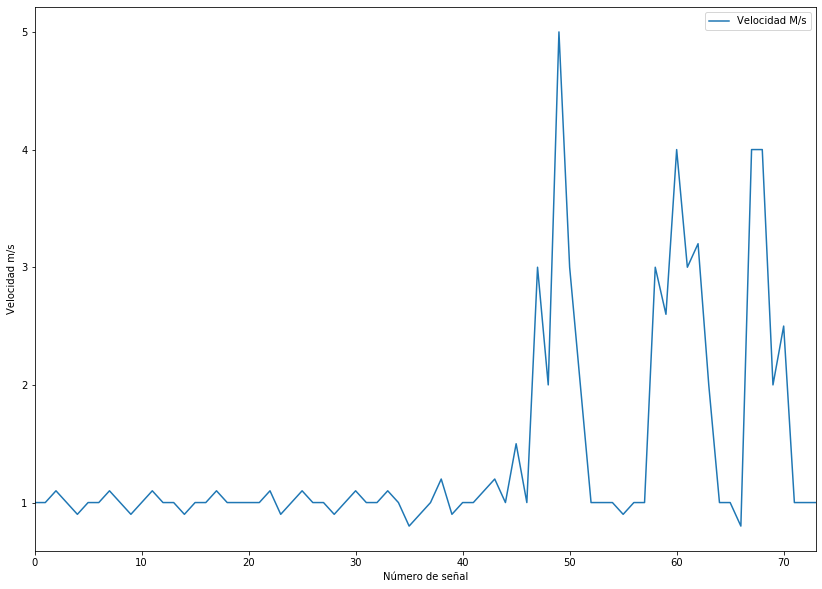

In [3]:
import pandas as pd
from matplotlib import pyplot

url = 'velocidad.csv'

series = pd.read_csv(url, header=None).T
contenido = (series.T).values.tolist()
print("\n Contenido del CSV")
print(contenido[0])
series = series.reindex()
series.columns = ["Velocidad M/s"]
print("\n")
print(series.head())
print("\n Métricas encontradas ")
print(series.describe())
series.plot(figsize=(14,10))
pyplot.xlabel('Número de señal')
pyplot.ylabel('Velocidad m/s')
pyplot.show()



###Descripción de los datos

En el gráfico, que se encuentra asociado se pueden notar picos de velocidades por cada señal o toma obtenida, viendo que entre los últimos datos obtenidos sube drásticamente su velocidad, notando que según sea el ejercicio el rendimiento sube.
 

###Convolución con filtro
Para el set de datos de las velocidades registradas por metros por segundo de una persona, vamos a proceder al segundo punto antes mencionado. EL cual es aplicar convolución a los datos. 
Primeramente vamos a definir las funciones para realizar la convolución, donde la función **f** son los registros del dataset y la función **g** es un filtro con la forma $g = [1 1 1 1 1 1 1_{m}]^{T}, g \in \mathbb{R}^{m}$. Observemos los datos de ambas funciones. 

In [4]:

#Primer filtro 
f = pnd.DataFrame (contenido[0]) 
g = pnd.DataFrame(  ([1] * 6) )

#Funciones a convolucionar 
print("La función f es:")
print(f)
print("\n\nLa función g es:")
print(g)



La función f es:
      0
0   1.0
1   1.0
2   1.1
3   1.0
4   0.9
..  ...
69  2.0
70  2.5
71  1.0
72  1.0
73  1.0

[74 rows x 1 columns]


La función g es:
   0
0  1
1  1
2  1
3  1
4  1
5  1


Hacemos uso de la función *y=hagaconvolucion1D(f,g)* y guardamos el resultado en la variable y, así como también, imprimimos el resultado de la operación. 

In [5]:

#Convolucion de las funciones
y = hagaConvolucion1D(f,g)
print("\n\nLa convolución 1D es:")
print (y)




La convolución 1D es:
      0
0   1.0
1   2.0
2   3.1
3   4.1
4   5.0
..  ...
74  7.5
75  5.5
76  3.0
77  2.0
78  1.0

[79 rows x 1 columns]


Con el objetivo de hacer notar la diferencia, procedemos a visualizar los datos originales, sin aplicar ningún filtro. En el **eje x** se observan los numeros de las señales y en el **eje y** las velocidades registradas.



Gráfica con datos sin suavizar:


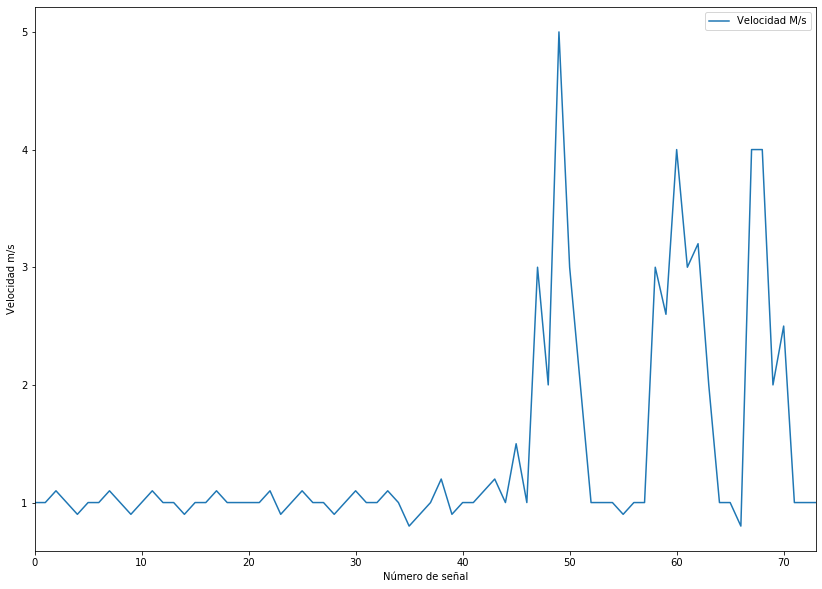

In [6]:

# Gráfica de los datos originales 
print("\n\nGráfica con datos sin suavizar:")
series.plot(figsize=(14,10))
pyplot.xlabel('Número de señal')
pyplot.ylabel('Velocidad m/s')
pyplot.show()




 Con respecto, al gráfico original se notan los picos de los datos, de una forma muy brusca. Es por ello que procedemos a visualizar los datos con la señal suavizada. Es decir, gráfico de las funciones **f** y **g** convolucionadas. En el **eje x** se observan los numeros de las señales y en el **eje y** las velocidades registradas. 



Gráfica con datos suavizados


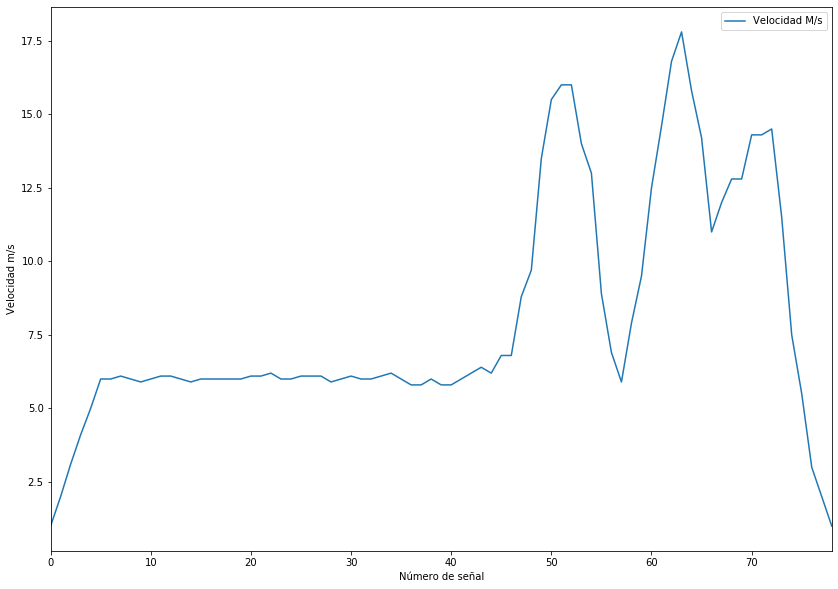

In [7]:

# Gráfico de la datos suavizados por el filtro básico
print("\n\nGráfica con datos suavizados")
data = y
data.columns = ["Velocidad M/s"]
data.plot(figsize=(14,10))
pyplot.xlabel('Número de señal')
pyplot.ylabel('Velocidad m/s')
pyplot.show()




En este gráfico se puede observar como la función **g** cumple la labor de convolucionar con la función **f** generando un filtro básico, donde se nota que se ha suavizado la señal pero siguen existiendo picos. Procedemos a aplicar un filtro Gaussiano. Denotando la función para el filtro de la siguiente manera: $filtroGaussiano = [1\;6\;15\;20\;15\;6\;1_{m}]^{T}, filtroGaussiano \in \mathbb{R}^{m}$. 
Además observaremos el comportamiento al agregar más valores al filtro Gaussiano, denotado de la siguiente manera: $filtroGaussiano2 = [1\;6\;15\;20\;55\;20\;15\;6\;1_{m}]^{T}, filtroGaussiano2 \in \mathbb{R}^{m}$.

En el **eje x** se observan los numeros de las señales y en el **eje y** las velocidades registradas. 



Gráfica con datos suavizados


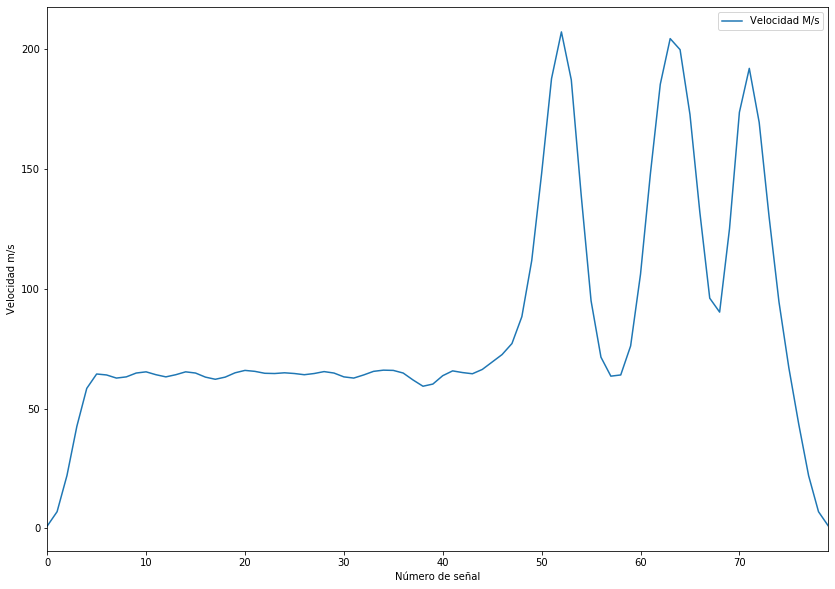



Gráfica con datos suavizados


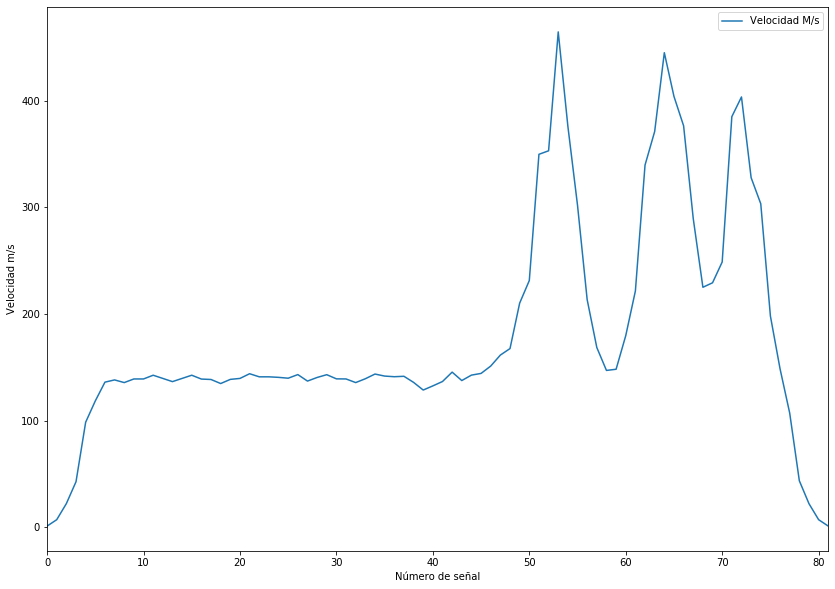

In [8]:

#Filtro gaussiano 
filtroGaussiano =  pnd.DataFrame( [1,6,15,20,15,6,1] )

# Gráfico de la datos suavizados por el filtro gaussiano
y = hagaConvolucion1D(f,filtroGaussiano)
print("\n\nGráfica con datos suavizados")
data = y
data.columns = ["Velocidad M/s"]
data.plot(figsize=(14,10))
pyplot.xlabel('Número de señal')
pyplot.ylabel('Velocidad m/s')
pyplot.show()



#Filtro gaussiano 2 
filtroGaussiano2 =  pnd.DataFrame( [1,6,15,20,55,20,15,6,1] )

# Gráfico de la datos suavizados por el filtro gaussiano 2
y = hagaConvolucion1D(f,filtroGaussiano2)
print("\n\nGráfica con datos suavizados")
data = y
data.columns = ["Velocidad M/s"]
data.plot(figsize=(14,10))
pyplot.xlabel('Número de señal')
pyplot.ylabel('Velocidad m/s')
pyplot.show()



Este es de los filtros más llamativos, porque es el que suaviza la información de mayor forma, generando la visión de una campana gaussiana, esto para el filtro Gaussiano 1, pero si observamos el filtro Gaussiano 2, observamos como este tiene un comportamiento similar al filtro básico, pero con menor suavidad.  Ahora bien, vamos a aplicar dos filtros más. Veamos el comportamiento al aplicar un filtro de media ponderada. Denotando la función para el filtro de la siguiente manera: $filtroMediaPonderada = [1\;1\;1\;2\;1\;1\;1_{m}]^{T}, filtroMediaPonderada \in \mathbb{R}^{m}$.

En el **eje x** se observan los numeros de las señales y en el **eje y** las velocidades registradas. 



Gráfica con datos suavizados


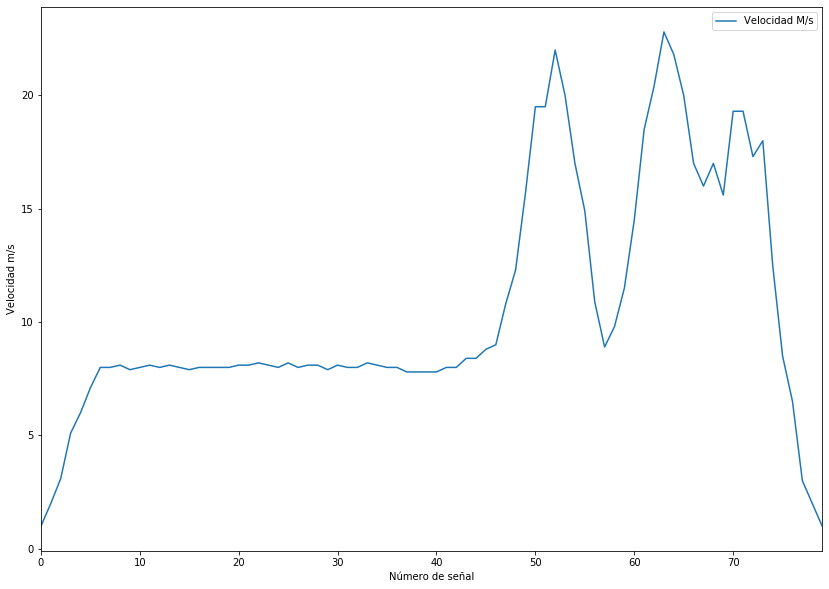

In [9]:

# Filtro de media ponderada 
filtroMediaPonderada =  pnd.DataFrame( [1,1,1,2,1,1,1] )


# Gráfico de la datos suavizados por el filtro de media ponderada
y = hagaConvolucion1D(f,filtroMediaPonderada)
print("\n\nGráfica con datos suavizados")
data = y
data.columns = ["Velocidad M/s"]
data.plot(figsize=(14,10))
pyplot.xlabel('Número de señal')
pyplot.ylabel('Velocidad m/s')
pyplot.show()


Este filtro se comporta parecido al filtro básico, este también disminuye los picos en el gráfico de una forma moderada. Esto debido a que da mayor peso al valor central para evitar la pérdida de detalles en los valores de su función. Veamos el comportamiento de un filtro de paso alto, el contrario a los filtros que hemos estado observando, los de paso bajo. 
Aplicaremos una variación al filtro Laplaciano, denotando la función para el filtro de la siguiente manera: $filtroLaplaciano = [1\;0\;1\;0\;-4\;0\;1\;0\;1_{m}]^{T}, filtroLaplaciano \in \mathbb{R}^{m}$.

En el **eje x** se observan los numeros de las señales y en el **eje y** las velocidades registradas. 





Gráfica con datos suavizados


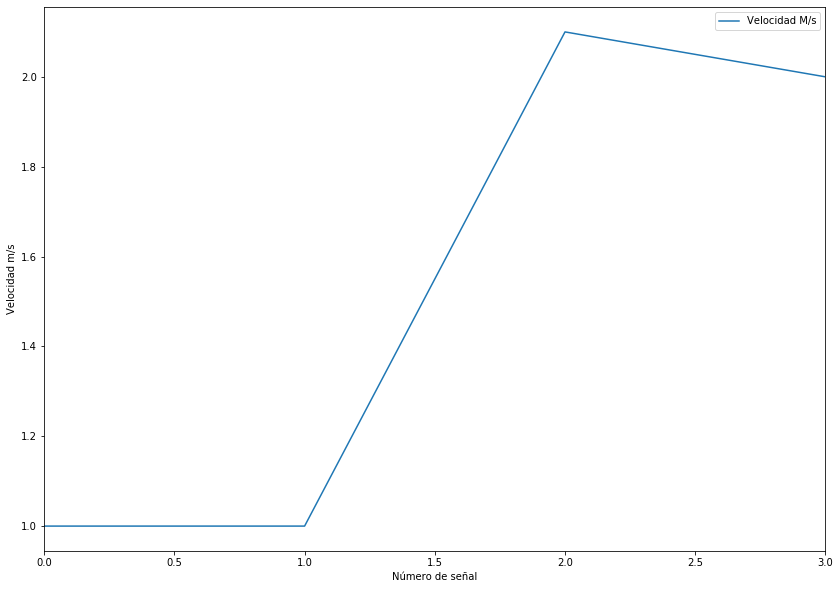

In [10]:

# Filtro Laplaciano  
filtroLaplaciano =  pnd.DataFrame( [1,0,1,0,-4,0,1,0,1] )


# Gráfico de la datos suavizados por el filtro Laplaciano
y = hagaConvolucion1D(f,filtroLaplaciano)
print("\n\nGráfica con datos suavizados")
data = y
data.columns = ["Velocidad M/s"]
data.plot(figsize=(14,10))
pyplot.xlabel('Número de señal')
pyplot.ylabel('Velocidad m/s')
pyplot.show()

El filtro Laplaciono está dado de la siguiente manera $filtroLaplaciano = [0\;1\;0\;1\;-4\;1\;0\;1\;0_{m}]^{T}, filtroLaplaciano \in \mathbb{R}^{m}$. Sin embargo se le aplicó una variación a los valores de los costados respecto al valor central (-4). Invirtiendo los unos por ceros y viceversa, esto con el objetivo de obtener un resultado válido al convolucionar. En la gráfica se observa como los valores tomaron una forma completamente distinta a la que hemos venido observando. Podriamos decir que pasamos de tener filtros con comportamientos similares a la hora de suavizar los datos a un filtro que transforma las líneas circulares a rectas.
 La aplicación de esta función y la modificación de los valores del filtro original, no es más que el afán de explorar y experimentar con la herramienta. 

---
#3. Filtros sobre Imagen Noisy.bmp
---
El tercer apartado de esta tarea consiste en aplicar filtros al archivo tipo imagen llamado noisy.bmp. Por ello, se procede a importar las librerias necesarias, así como también la imagen. Seguido de pasar la imagen a escala de grises, luego un filtro básico y 4 filtros más encontrados en el material adjunto al curso en el TECDigital, sobre filtrado. Estos filtros son: Filtro Sobel C, Filtro Norte, Filtro de Media, Filtro menos laplaciano.



*   a) Cargar la Imagen en Colab
*   b) Cargar la Imagen en Python
*   c) Visualizar la Imagen




Las dimensiones de la imagen es:
(605, 607)


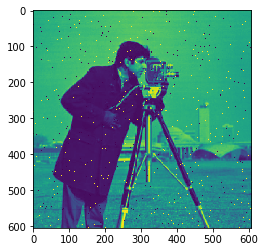

In [11]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import torch.nn.functional as F
import torch

# funcion para aplicacion del filtro de la imagen
def filtrar(imagen, filtro):
  imgNueva = F.conv2d(torch.Tensor(imagen).expand(1,1,-1,-1), torch.Tensor(filtro).expand(1,1,-1,-1), padding=0)
  imgNueva = imgNueva.numpy()
  return imgNueva.reshape((imgNueva.shape[2],imgNueva.shape[3]))


# Cargar la imagen en python
im = imageio.imread('noisy.bmp')  
print("Las dimensiones de la imagen es:")
print(im.shape)
plt.imshow(im, vmin=0, vmax=255)
plt.show()







*   d) Escala de grises de la imagen noisy








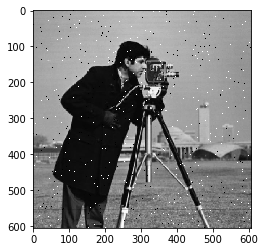

In [12]:

#Pasar la imagen a escala de grises 
grayImage = rgb2gray(im)
plt.imshow(grayImage, cmap=plt.get_cmap('gray'))
plt.show()








*   e) Filtro Básico
*   f) Visualización de los Resultados











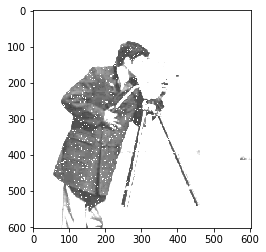

In [13]:

#Aplicacion del filtro básico 
filtroBasico =  [[1.0, 1.0, 1.0],
                [1.0, 1.0, 1.0],
                [1.0, 1.0, 1.0]]
plt.imshow(filtrar(grayImage, filtroBasico), vmin=0, vmax=255,cmap=plt.get_cmap('gray'))
plt.show()


El Filtro:$ [[1\;0\;1\;0\; 1\;0], [1\;0\; 1\;0\; 1\;0], [1\;0\; 1\;0\; 1\;0]]$, nos ayuda a asignar al pixel central la media de todos los pixeles incluídos en la ventana.





*   g) Aplicación de filtros 



---









*   Filtro Sobel C




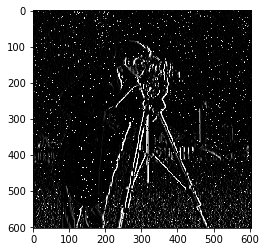

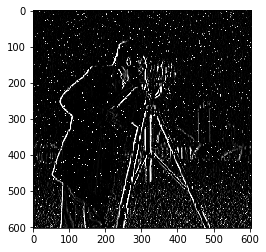

In [14]:

#Aplicacion del filto Sobel C
filtroSobelC=  [[-1.0, 0.0, 1.0],
               [-2.0, 0.0, 2.0],
               [-1.0, 0.0, 1.0]]
plt.imshow(filtrar(grayImage, filtroSobelC), vmin=0, vmax=255,cmap=plt.get_cmap('gray'))
plt.show()


#Aplicacion del filto Sobel C
filtroSobelC2=  [[1.0, 0.0, -1.0],
               [2.0, 0.0, -2.0],
               [1.0, 0.0, -1.0]]
plt.imshow(filtrar(grayImage, filtroSobelC2), vmin=0, vmax=255,cmap=plt.get_cmap('gray'))
plt.show()




Este filtro, como se puede observar ayuda a la detección de bordes, en un sentido de oscuro a claro, se puede ver que que detecta la estructura de la cámara y de la persona. 


Suponemos que esta combinación de valores, donde la columna central de la matriz son ceros y las columnas laterales poseen pesos distinto de cero. Al colocar pesos a los costados estamos resaltando los bordes y al colocar pesos negativos ya sea en la columna derecha o izquierda, es la dirección hacia la que queremos marcar los bordes de los objetos presentes en la imagen. Como se observa en la imagen anterior, al colocar pesos negativos a la izquierda y pesos positivos a la derecha marcamos los bordes en dirección izquierda-derecha, resaltando la cámara y el rostro del fotógrafo. Por el contrario, como se observa en la imagen 2, si colocamos los pesos negativos a la derecha y los positivos a la izquierda, resaltamos la silueta del fotógrafo y el tripode.



*   Filtro Norte



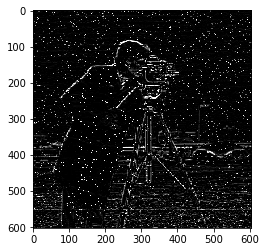

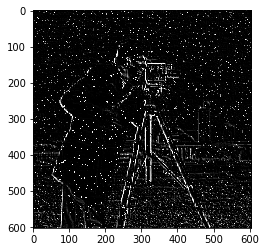

In [15]:

#Aplicacion del filtro Norte
filtroNorte=  [[1.0, 1.0, 1.0],
               [1.0, -2.0, 1.0],
               [-1.0, -1.0, -1.0]]
plt.imshow(filtrar(grayImage, filtroNorte), vmin=0, vmax=255,cmap=plt.get_cmap('gray'))
plt.show()



#Aplicacion del filtro Suroeste
filtroSuroeste=  [[1.0, -1.0, -1.0],
               [1.0, -2.0, -1.0],
               [1.0, 1.0, 1.0]]
plt.imshow(filtrar(grayImage, filtroSuroeste), vmin=0, vmax=255,cmap=plt.get_cmap('gray'))
plt.show()


A través de este filtro se puede detectar las estructuras que siguen una determinada dirección en el espacio. El filtro Norte y el filtro Suroeste pertenecen a los filtros de deteccción de bordes, como estos dos, existen 6 combinaciones más, que se comportan como las direcciones: norte, sur, este, oeste, noreste, sureste, suroeste, noroeste. 

Suponemos que al igual que el filtro Sobel C, los filtros de direcciones hacen uso de las columnas laterales con pesos diferente de cero para resaltar los bordes de los objetos presentes en la imagen. Cabe destacar que estos filtros sí hacen uso de la columna central, con valores distintos de cero. Todos los filtros de direcciones hacen uso de 3 distintos números (-2, -1, 1). El -2 siempre va en el centro de la matriz y la combinación de -1 y 1 es la que determina la dirección de los bordes en el espacio. Como se observa, al colocar la fila 3 con valores negativos, hacemos enfásis en los bordes norte, lo podemos visualizar en la imagen 1. Por otro lado, si vemos la imagen dos y la combinación de valores, estamos haciendo enfásis en los bordes suroeste.  



*   Filtro Laplaciano 



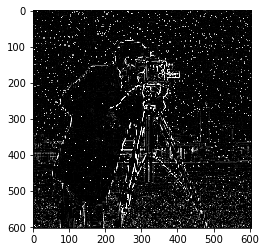

In [16]:

#Aplicacion del Filtro Laplaciano 
filtroLaplaciano=  [[-1.0, -1.0, -1.0],
               [-1.0, 8.0, -1.0],
               [-1.0, -1.0, -1.0]]
plt.imshow(filtrar(grayImage, filtroLaplaciano), vmin=0, vmax=255,cmap=plt.get_cmap('gray'))
plt.show()




En cuanto este filtro, es el mejor para detectar bordes. No discrimina las direcciones, es decir, es omnidireccional. 

Suponemos que al estar todos los valores que rodean el centro en negativo y el valor central ser un valor positivo alto, permite la detección de los bordes en todas las direcciones. 




*   Filtro Enfoque



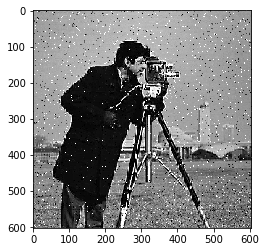

In [17]:

#Aplicacion del filtro de Enfoque
filtroEnfoque=  [[0.0, -1.0, 0.0],
               [-1.0, 5.0, -1.0],
               [0.0, -1.0, 0.0]]
plt.imshow(filtrar(grayImage, filtroEnfoque), vmin=0, vmax=255,cmap=plt.get_cmap('gray'))
plt.show()



Al aplicar este filtro nos ayuda a marcar los rasgos lineales y resalta los objetos con una variabilidad mayor. Con combinaciones de valores, donde las esquinas de la matriz son ceros y el centro un valor positivo alto, mientras los demás valores son negativos, específicamente -1. Permite enfocar la imagen.

# Referencias
* Aldalur B, Santamaría, M. (2002). Realce de imágenes: filtrado espacial. Revista de Teledetección. Recuperado de: http://www.aet.org.es/revistas/revista17/AET17-04.pdf.

* Giménez F, Monsoriu J, Alemany E. (2016). Aplicación de la convolución de matrices al filtrado de imágenes. Modeling in Science Education and Learning. Recuperado de: https://www.researchgate.net/publication/292187589_Aplicacion_de_la_convolucion_de_matrices_al_filtrado_de_imagenes/link/56ac1d6308ae43a39809d715/download






